# 1.Extract the File

In [7]:
# Extract the compressed file
!tar xvzf en.openfoodfacts.products.cookies.tar.gz

x en.openfoodfacts.products.cookies.csv


# 2. Load and FIlter the Data

In [12]:
import pandas as pd

# Load the extracted CSV file
df = pd.read_csv("en.openfoodfacts.products.cookies.csv", sep="\t", low_memory=False)

# Filter data for specific countries
countries = ['United States', 'France', 'Spain', 'United Kingdom', 'Canada', 
             'Italy', 'Australia', 'Switzerland', 'Brazil', 'India']
df = df[df['countries_en'].isin(countries)]

# Keep only the specified columns
columns = ['countries_en', 'completeness', 'serving_size', 'energy-kcal_100g', 
           'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 
           'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
           'sodium_100g', 'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 
           'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 
           'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 
           'vitamin-b12_100g', 'potassium_100g', 'calcium_100g', 'iron_100g', 
           'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 
           'iodine_100g', 'caffeine_100g']
df = df[columns]

# Apply additional filters
df = df[df['completeness'] > 0.60]
df = df[df['energy-kcal_100g'] > 0.0]

# Save the filtered data
df.to_csv("cookies.data-filtered.csv", index=False)
print("Filtered data saved as cookies.data-filtered.csv")


Filtered data saved as cookies.data-filtered.csv


# 3. Plotting the Data

3.1 Frequency of Cookies by COuntry

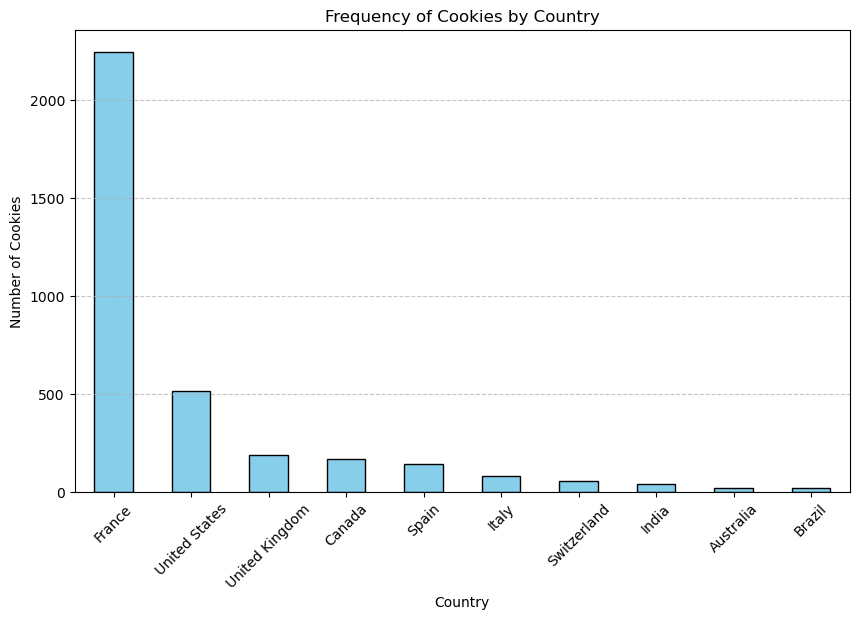

In [16]:
import matplotlib.pyplot as plt

# Count cookies by country
country_counts = df['countries_en'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Cookies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cookies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


3.2 Completeness Bins

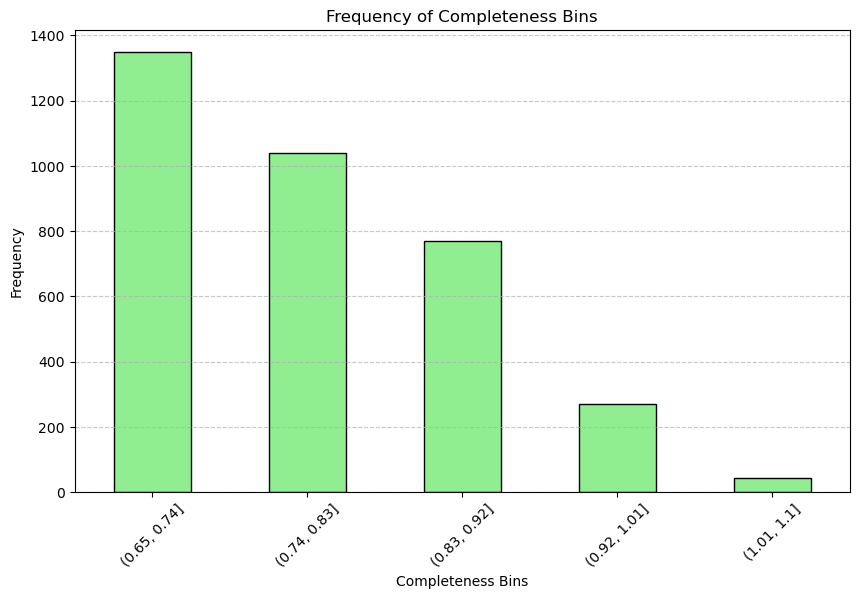

In [19]:
# Bin the completeness column into 5 intervals
df['completeness_bins'] = pd.cut(df['completeness'], bins=5)

# Count frequency of each bin
completeness_counts = df['completeness_bins'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
completeness_counts.sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frequency of Completeness Bins')
plt.xlabel('Completeness Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 4. Nomralizing Serving Size

In [22]:
# Normalize serving_size
df['serving_size'] = df['serving_size'].str.replace(',', '.')
df['serving_size'] = df['serving_size'].str.extract(r'(\d+\.?\d*)').astype(float)

# Drop rows with missing values in serving_size
df = df.dropna(subset=['serving_size'])

# Save the cleaned data
df.to_csv("cookies.data-filtered-final.csv", index=False)
print("Cleaned data saved as cookies.data-filtered-final.csv")


Cleaned data saved as cookies.data-filtered-final.csv


# 5. Performing Statistics

5.1 Meand and MEdian

In [26]:
# Calculate mean and median
mean_serving = df['serving_size'].mean()
median_serving = df['serving_size'].median()

print(f"Mean Serving Size: {mean_serving}")
print(f"Median Serving Size: {median_serving}")


Mean Serving Size: 35.358783220720724
Median Serving Size: 23.0


5.2 Standard Deviation

In [29]:
# Calculate standard deviation
std_cholesterol = df['cholesterol_100g'].std()

print(f"Standard Deviation of Cholesterol: {std_cholesterol}")


Standard Deviation of Cholesterol: 2.270844590823818


5.3 Top Sweetest Cookkies

In [32]:
# Calculate sweetness
df['sweetness'] = (df['sugars_100g'] / 100) * df['serving_size']

# Find top 5 sweetest cookies
top_sweetest = df.sort_values(by='sweetness', ascending=False).head(5)
print("Top 5 Sweetest Cookies:")
print(top_sweetest[['countries_en', 'sweetness']])


Top 5 Sweetest Cookies:
        countries_en  sweetness
2908           Spain    431.685
23706         France    124.640
32545    Switzerland     60.000
22468         France     60.000
15006  United States     57.000


5.4 Average Sugars 

In [35]:
# Average sugars in French cookies
avg_sugars_fr = df[df['countries_en'] == 'France']['sugars_100g'].mean()

# Average sugars in US cookies
avg_sugars_us = df[df['countries_en'] == 'United States']['sugars_100g'].mean()

print(f"Average Sugars in French Cookies: {avg_sugars_fr}")
print(f"Average Sugars in US Cookies: {avg_sugars_us}")


Average Sugars in French Cookies: 26.877281154476794
Average Sugars in US Cookies: 31.57158714397586


5.5 Comparison

In [38]:
# Average sugars for French cookies
avg_sugars_fr = df[df['countries_en'] == 'France']['sugars_100g'].mean()

# Average sugars for US cookies
avg_sugars_us = df[df['countries_en'] == 'United States']['sugars_100g'].mean()

print(f"Average Sugars in French Cookies: {avg_sugars_fr}")
print(f"Average Sugars in US Cookies: {avg_sugars_us}")

# Comparison
if avg_sugars_fr > avg_sugars_us:
    print("French cookies have a higher average sugar content than US cookies.")
elif avg_sugars_fr < avg_sugars_us:
    print("US cookies have a higher average sugar content than French cookies.")
else:
    print("French and US cookies have the same average sugar content.")


Average Sugars in French Cookies: 26.877281154476794
Average Sugars in US Cookies: 31.57158714397586
US cookies have a higher average sugar content than French cookies.


# 6. K Means CLustering

6.1 Preparing the data for clustering

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select columns for clustering
cluster_columns = ['serving_size', 'energy-kcal_100g', 'fat_100g', 'cholesterol_100g', 
                   'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
                   'sodium_100g', 'vitamin-c_100g', 'vitamin-b12_100g', 'potassium_100g', 
                   'calcium_100g', 'iron_100g']

# Drop rows with missing values
cluster_data = df[cluster_columns].dropna()

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)


6.2 Applying K-Means Clustering

In [49]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")
# Initialize and fit KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(cluster_data_scaled)

# Add cluster labels
cluster_data['cluster'] = kmeans.labels_

# Save cluster data
cluster_data.to_csv("clustered_cookies.csv", index=False)
print("Clustered data saved as clustered_cookies.csv")


Clustered data saved as clustered_cookies.csv


6.3 Describing the Centroids

In [52]:
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Reverse scaling for interpretability
centroids_original = scaler.inverse_transform(centroids)

# Create DataFrame for centroids
centroid_df = pd.DataFrame(centroids_original, columns=cluster_columns)

print("Cluster Centroids:")
print(centroid_df)


Cluster Centroids:
   serving_size  energy-kcal_100g   fat_100g  cholesterol_100g  \
0           4.2        491.270000  22.780000           0.00920   
1         325.0         15.800000   0.923000           0.00615   
2           3.0        469.000000  28.120000           0.01600   
3           1.0        375.000000  10.420000           0.00000   
4           1.0        381.944444   4.427083           0.00000   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  sodium_100g  \
0           69.192000    32.154000    1.910000       4.342000     0.320424   
1            1.230000     0.308000    0.308000       9.230000     0.071900   
2           62.500000     0.000000    6.200000       6.250000     0.425000   
3           58.330000    25.000000    8.300000      16.670000     0.250000   
4           66.493056    32.291667    5.902778       5.902778     0.445312   

   vitamin-c_100g  vitamin-b12_100g  potassium_100g  calcium_100g  iron_100g  
0         0.00040     -3.388132e-21 

6.4 Interpreting the clusters

In [55]:
# Describe each cluster
for i, row in centroid_df.iterrows():
    print(f"Cluster {i+1}:")
    for col in cluster_columns:
        print(f"- {col}: {row[col]:.2f}")
    print()


Cluster 1:
- serving_size: 4.20
- energy-kcal_100g: 491.27
- fat_100g: 22.78
- cholesterol_100g: 0.01
- carbohydrates_100g: 69.19
- sugars_100g: 32.15
- fiber_100g: 1.91
- proteins_100g: 4.34
- sodium_100g: 0.32
- vitamin-c_100g: 0.00
- vitamin-b12_100g: -0.00
- potassium_100g: 0.11
- calcium_100g: 0.01
- iron_100g: 0.00

Cluster 2:
- serving_size: 325.00
- energy-kcal_100g: 15.80
- fat_100g: 0.92
- cholesterol_100g: 0.01
- carbohydrates_100g: 1.23
- sugars_100g: 0.31
- fiber_100g: 0.31
- proteins_100g: 9.23
- sodium_100g: 0.07
- vitamin-c_100g: 0.01
- vitamin-b12_100g: 0.00
- potassium_100g: 0.06
- calcium_100g: 0.20
- iron_100g: 0.00

Cluster 3:
- serving_size: 3.00
- energy-kcal_100g: 469.00
- fat_100g: 28.12
- cholesterol_100g: 0.02
- carbohydrates_100g: 62.50
- sugars_100g: 0.00
- fiber_100g: 6.20
- proteins_100g: 6.25
- sodium_100g: 0.42
- vitamin-c_100g: 0.00
- vitamin-b12_100g: 0.00
- potassium_100g: 0.13
- calcium_100g: 0.00
- iron_100g: 0.00

Cluster 4:
- serving_size: 1.00
-

Compute the variance across cluster centroids

In [58]:
variances = centroid_df.var(axis=0)
print("Features with the most variance across clusters:")
print(variances.sort_values(ascending=False))

Features with the most variance across clusters:
energy-kcal_100g      3.684890e+04
serving_size          2.082893e+04
carbohydrates_100g    8.081271e+02
sugars_100g           2.726455e+02
fat_100g              1.374275e+02
proteins_100g         2.409415e+01
fiber_100g            1.089396e+01
calcium_100g          8.940971e-02
sodium_100g           2.291388e-02
potassium_100g        4.387672e-03
vitamin-c_100g        1.210145e-04
cholesterol_100g      4.547450e-05
iron_100g             3.129975e-05
vitamin-b12_100g      6.605021e-09
dtype: float64


Save cluster assignments

In [61]:
cluster_data.to_csv("clustered_cookies.csv", index=False)
print("Cluster assignments saved to clustered_cookies.csv")

Cluster assignments saved to clustered_cookies.csv





Save the cluster centroids


In [66]:
centroid_df.to_csv("cluster_centroids.csv", index=False)
print("Cluster centroids saved to cluster_centroids.csv")

Cluster centroids saved to cluster_centroids.csv
